In [97]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import pickle as pkl

In [21]:
db_file = "./data/database.sqlite"
try:
    conn = sqlite3.connect(db_file)
except Exception as e:
    print(e)

In [22]:
cur  = conn.cursor()
tables = cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
# conn.tables

In [23]:
# tables.fetchall()

[(u'sqlite_sequence',),
 (u'Player_Attributes',),
 (u'Player',),
 (u'Match',),
 (u'League',),
 (u'Country',),
 (u'Team',),
 (u'Team_Attributes',)]

In [24]:
players = pd.read_sql_query("SELECT * from Player", conn)
match = pd.read_sql_query("SELECT * from Match",conn)
league = pd.read_sql_query("SELECT * from League",conn)
team = pd.read_sql_query("SELECT * from Team",conn)
player_attr = pd.read_sql_query("SELECT * from Player_Attributes",conn)
team_attr = pd.read_sql_query("SELECT * from Team_Attributes",conn)

In [80]:
num_matches = g.merge(league,left_on='league_id',right_on='id')
num_matches['no_of_matches'] = num_matches['count']
num_matches = num_matches[['name', 'no_of_matches']]

In [82]:
num_matches

,name,no_of_matches
0,Belgium Jupiler League,1728
1,England Premier League,3040
2,France Ligue 1,3040
3,Germany 1. Bundesliga,2448
4,Italy Serie A,3017
5,Netherlands Eredivisie,2448
6,Poland Ekstraklasa,1920
7,Portugal Liga ZON Sagres,2052
8,Scotland Premier League,1824
9,Spain LIGA BBVA,3040


In [99]:
barca = team_attr.iloc[123]
barca = barca.drop(['id','team_fifa_api_id','team_api_id','date'])
barca = pd.DataFrame(barca)

In [103]:
# barca.to_html()

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>FC Barcelona</th>    </tr>  </thead>  <tbody>    <tr>      <th>buildUpPlaySpeed</th>      <td>36</td>    </tr>    <tr>      <th>buildUpPlaySpeedClass</th>      <td>Balanced</td>    </tr>    <tr>      <th>buildUpPlayDribbling</th>      <td>35</td>    </tr>    <tr>      <th>buildUpPlayDribblingClass</th>      <td>Normal</td>    </tr>    <tr>      <th>buildUpPlayPassing</th>      <td>51</td>    </tr>    <tr>      <th>buildUpPlayPassingClass</th>      <td>Mixed</td>    </tr>    <tr>      <th>buildUpPlayPositioningClass</th>      <td>Free Form</td>    </tr>    <tr>      <th>chanceCreationPassing</th>      <td>36</td>    </tr>    <tr>      <th>chanceCreationPassingClass</th>      <td>Normal</td>    </tr>    <tr>      <th>chanceCreationCrossing</th>      <td>49</td>    </tr>    <tr>      <th>chanceCreationCrossingClass</th>      <td>Normal</td>    </tr>    <tr>      <th>chanceCreationShooting</th>      <td>56</td>    </tr>    <tr>      <th>chanceCreationShootingClass</th>      <td>Normal</td>    </tr>    <tr>      <th>chanceCreationPositioningClass</th>      <td>Free Form</td>    </tr>    <tr>      <th>defencePressure</th>      <td>61</td>    </tr>    <tr>      <th>defencePressureClass</th>      <td>Medium</td>    </tr>    <tr>      <th>defenceAggression</th>      <td>65</td>    </tr>    <tr>      <th>defenceAggressionClass</th>      <td>Press</td>    </tr>    <tr>      <th>defenceTeamWidth</th>      <td>65</td>    </tr>    <tr>      <th>defenceTeamWidthClass</th>      <td>Normal</td>    </tr>    <tr>      <th>defenceDefenderLineClass</th>      <td>Cover</td>    </tr>  </tbody></table>

In [27]:
players[players['player_name'] == 'Lionel Messi']

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
6169,6176,30981,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159


In [34]:
# player_attr[player_attr['player_api_id'] == 30981]
messi = player_attr.iloc[102482].drop(['id','player_fifa_api_id','player_api_id','date','preferred_foot','attacking_work_rate',
                              'defensive_work_rate'])

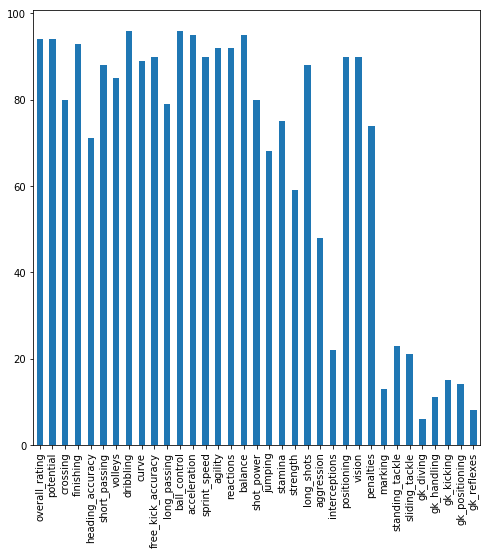

In [107]:
messi.plot(kind='bar',figsize=(8,8))
plt.savefig('messi.png',bbox_inches='tight')
plt.show()

In [75]:
match.shape

(25979, 115)

In [62]:
g = match.groupby('league_id').count()
g['count'] = g['id']
g = pd.DataFrame(g['count'])

In [87]:
# league

In [70]:
g['league_id'] = g.index

In [86]:
keys = match.keys()
for k in keys:
#     print k

IndentationError: expected an indented block (<ipython-input-86-69e6230dec3d>, line 3)

# Data Preprocessing

In [176]:
def match_names(team_name):
    return team_name[:-3]

def parse_time(date):
    date = pd.datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
    return date.strftime('%m/%d/%y')

In [177]:
event_data = pd.read_csv("./data/event_data.csv")
line_up = pd.read_csv("./data/lineup.csv")
match_data = pd.read_csv("./data/match_data.csv")

match_data['date'] = pd.to_datetime(match_data['date'],format='%m/%d/%y') 

match_data['match_id'] = match_data['temp_id']
match_data.drop('temp_id',axis=1,inplace=True)
event_data['match_id'] = event_data['join_id']
event_data.drop('join_id',axis=1,inplace=True)

In [178]:
match_data.head()

,id,week,home,away,date,winner,score,match_id
0,1,1,Stoke City FC,Manchester United FC,2015-01-01,0,1 - 1,1510558737260
1,2,1,Aston Villa FC,Crystal Palace FC,2015-01-01,0,0 - 0,1510558739889
2,3,1,Hull City AFC,Everton FC,2015-01-01,1,2 - 0,1510558742375
3,4,1,Liverpool FC,Leicester City FC,2015-01-01,0,2 - 2,1510558746776
4,5,1,Manchester City FC,Sunderland A FC,2015-01-01,1,3 - 2,1510558750499


In [128]:
event_data.head()

,id,minute,player_name,event_type,event_datacol,match_id
0,1,81',O. Assaidi,M. Arnautovi?,H,1510558737260
1,2,2',R. Shawcross,P. Crouch,H,1510558737260
2,3,NaN,NaN,NaN,H,1510558737260
3,4,75',Rafael,A. Young,A,1510558737260
4,5,64',Ander Herrera,R. Falcao,A,1510558737260


In [57]:
# line_up.head()

In [179]:
match_data.head()

,id,week,home,away,date,winner,score,match_id
0,1,1,Stoke City FC,Manchester United FC,2015-01-01,0,1 - 1,1510558737260
1,2,1,Aston Villa FC,Crystal Palace FC,2015-01-01,0,0 - 0,1510558739889
2,3,1,Hull City AFC,Everton FC,2015-01-01,1,2 - 0,1510558742375
3,4,1,Liverpool FC,Leicester City FC,2015-01-01,0,2 - 2,1510558746776
4,5,1,Manchester City FC,Sunderland A FC,2015-01-01,1,3 - 2,1510558750499


In [180]:
minutes = pd.DataFrame(range(91),columns=['minute'])
match_data['dump'] = [1 for i in range(match_data.shape[0])]
minutes['dump'] = [1 for i in range(minutes.shape[0])]

match_data = pd.merge(match_data,minutes).drop('dump',axis=1)

In [181]:
event_data.dropna(inplace=True,axis=0, how= 'any')
event_data.minute = event_data.minute.astype("str")
for i,row in event_data.iterrows():
    if "+" in event_data.loc[i,('minute')]:
        event_data.loc[i,('minute')] = event_data.loc[i,('minute')][:2]
    else:
        event_data.loc[i,('minute')] = event_data.loc[i,('minute')][:-1]

event_data.minute = event_data.minute.astype("int")
event_data.sort_values(["match_id",'minute'],inplace=True)
event_data.dropna(axis=0,how='any',inplace=True)

In [20]:
# match_data['join_id'] = str(match_data['match_id'])+str(match_data['minute'])
# event_data['join_id'] = str(event_data['match_id'])+str(event_data['minute'])

# event_data.drop_duplicates(subset=["match_id", "minute"], keep='first', inplace=True)
# event_data.head(10)

In [107]:
# match_data.head(20)

In [182]:
minute_data = pd.merge(match_data,event_data,on=["match_id", "minute"],how='left')

minute_data.sort_values(["match_id",'minute'],inplace=True)

# minute_data.head(10)

minute_data = minute_data[minute_data.event_type!='Assist']
minute_data.drop(["id_x", "id_y"], axis=1, inplace=True)

minute_data.reset_index(drop=True, inplace=True)

minute_data['H_Goal'] = 0
minute_data['A_Goal'] = 0

minute_data['home'] = minute_data['home'].map(match_names)
minute_data['away'] = minute_data['away'].map(match_names)


In [183]:
match_id = minute_data["match_id"][0]

for i, row in minute_data.iterrows():
    if row.minute == 0:
        continue

    if row.match_id != match_id:
        match_id = row.match_id
        
    
    if row.event_type in ['Goal', 'Penalty Goal']:
        if row.event_datacol == 'H':
            minute_data.loc[i, ("H_Goal")] = minute_data.loc[i-1, ("H_Goal")]+1
            minute_data.loc[i, ("A_Goal")] = minute_data.loc[i-1, ("A_Goal")]
            
        else:
            minute_data.loc[i, ("A_Goal")] = minute_data.loc[i-1, ("A_Goal")]+1
            minute_data.loc[i, ("H_Goal")] = minute_data.loc[i-1, ("H_Goal")]
    
    elif row.event_type == 'Own Goal':
        if row.event_datacol == 'A':
            minute_data.loc[i, ("H_Goal")] = minute_data.loc[i-1, ("H_Goal")]+1
            minute_data.loc[i, ("A_Goal")] = minute_data.loc[i-1, ("A_Goal")]
            
        else:
            minute_data.loc[i, ("A_Goal")] = minute_data.loc[i-1, ("A_Goal")]+1
            minute_data.loc[i, ("H_Goal")] = minute_data.loc[i-1, ("H_Goal")]
            
    else:
        minute_data.loc[i, ("H_Goal")] = minute_data.loc[i-1, ("H_Goal")]
        minute_data.loc[i, ("A_Goal")] = minute_data.loc[i-1, ("A_Goal")]
        


In [193]:
# event_data.head(95)

,id,minute,player_name,event_type,event_datacol,match_id
1,2,2,R. Shawcross,P. Crouch,H,1510558737260
6,7,26,R. Falcao,M. Carrick,A,1510558737260
4,5,64,Ander Herrera,R. Falcao,A,1510558737260
5,6,64,A. Januzaj,L. Shaw,A,1510558737260
3,4,75,Rafael,A. Young,A,1510558737260
0,1,81,O. Assaidi,M. Arnautovi?,H,1510558737260
10,11,15,C. Clark,R. Vlaar,H,1510558739889
14,15,62,D. Gayle,W. Zaha,A,1510558739889
9,10,64,J. Grealish,T. Cleverley,H,1510558739889
8,9,78,C. Clark,Yellow Card,H,1510558739889


In [185]:
with open("./data/minute/201516.pkl","wb") as file:
    pkl.dump(minute_data,file)

# with open("./data/minute/201516.pkl","wb") as file:
#     minute_data = pkl.load(file)

In [186]:
db_file = "./data/database.sqlite"
try:
    conn = sqlite3.connect(db_file)
except Exception as e:
    print(e)
    
cur  = conn.cursor()
tables = cur.execute("SELECT name FROM sqlite_master WHERE type='table'")

players = pd.read_sql_query("SELECT * from Player", conn)
match = pd.read_sql_query("SELECT * from Match",conn)
league = pd.read_sql_query("SELECT * from League",conn)
team = pd.read_sql_query("SELECT * from Team",conn)
player_attr = pd.read_sql_query("SELECT * from Player_Attributes",conn)
team_attr = pd.read_sql_query("SELECT * from Team_Attributes",conn)

In [187]:
minute_data.head(100)

,week,home,away,date,winner,score,match_id,minute,player_name,event_type,event_datacol,H_Goal,A_Goal
0,1,Stoke City,Manchester United,2015-01-01,0,1 - 1,1510558737260,0,NaN,NaN,NaN,0,0
1,1,Stoke City,Manchester United,2015-01-01,0,1 - 1,1510558737260,1,NaN,NaN,NaN,0,0
2,1,Stoke City,Manchester United,2015-01-01,0,1 - 1,1510558737260,2,R. Shawcross,P. Crouch,H,0,0
3,1,Stoke City,Manchester United,2015-01-01,0,1 - 1,1510558737260,3,NaN,NaN,NaN,0,0
4,1,Stoke City,Manchester United,2015-01-01,0,1 - 1,1510558737260,4,NaN,NaN,NaN,0,0
5,1,Stoke City,Manchester United,2015-01-01,0,1 - 1,1510558737260,5,NaN,NaN,NaN,0,0
6,1,Stoke City,Manchester United,2015-01-01,0,1 - 1,1510558737260,6,NaN,NaN,NaN,0,0
7,1,Stoke City,Manchester United,2015-01-01,0,1 - 1,1510558737260,7,NaN,NaN,NaN,0,0
8,1,Stoke City,Manchester United,2015-01-01,0,1 - 1,1510558737260,8,NaN,NaN,NaN,0,0
9,1,Stoke City,Manchester United,2015-01-01,0,1 - 1,1510558737260,9,NaN,NaN,NaN,0,0


In [109]:
# league

In [157]:
epl_matches = match[match['league_id'] == 1729]
epl_matches = pd.merge(epl_matches,team,left_on="home_team_api_id",right_on="team_api_id")
epl_matches['home_team'] = epl_matches['team_long_name']
epl_matches.drop(['id_y','team_api_id','team_fifa_api_id','team_long_name', 'team_short_name'],axis=1,inplace=True)

epl_matches = pd.merge(epl_matches,team,left_on="away_team_api_id",right_on="team_api_id")
epl_matches['away_team'] = epl_matches['team_long_name']
epl_matches.drop(['id','team_api_id','team_fifa_api_id','team_long_name', 'team_short_name'],axis=1,inplace=True)

epl_matches.drop(['id_x','country_id','league_id','home_team_goal','away_team_goal'],axis=1,inplace=True)

# epl_matches['date'] = epl_matches['date'].map(parse_time)

epl_matches['date'] = pd.to_datetime(epl_matches['date'])

In [159]:
epl_matches.head()

,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_player_X1,home_player_X2,home_player_X3,home_player_X4,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_team,away_team
0,2008/2009,1,2008-08-17,489042,10260,10261,1.0,2.0,4.0,6.0,...,5.50,12.00,1.30,4.75,10.0,1.29,4.50,11.0,Manchester United,Newcastle United
1,2010/2011,1,2010-08-16,839802,10260,10261,1.0,2.0,4.0,6.0,...,6.00,15.00,1.23,5.50,12.0,1.22,5.50,13.0,Manchester United,Newcastle United
2,2011/2012,13,2011-11-26,1024845,10260,10261,1.0,2.0,4.0,6.0,...,4.75,9.50,1.35,4.50,8.5,1.40,4.33,8.5,Manchester United,Newcastle United
3,2012/2013,19,2012-12-26,1229300,10260,10261,1.0,2.0,4.0,6.0,...,6.50,13.00,1.22,6.50,11.0,1.25,6.00,10.0,Manchester United,Newcastle United
4,2013/2014,15,2013-12-07,1474518,10260,10261,1.0,2.0,4.0,6.0,...,4.50,6.25,NaN,NaN,NaN,NaN,NaN,NaN,Manchester United,Newcastle United


In [170]:
minute_data.head()

,week,home,away,date,winner,score,match_id,minute,player_name,event_type,event_datacol,H_Goal,A_Goal
0,1,Stoke City,Manchester United,2015-01-01,0,1 - 1,1510558737260,0,NaN,NaN,NaN,0,0
1,1,Stoke City,Manchester United,2015-01-01,0,1 - 1,1510558737260,1,NaN,NaN,NaN,0,0
2,1,Stoke City,Manchester United,2015-01-01,0,1 - 1,1510558737260,2,R. Shawcross,P. Crouch,H,0,0
3,1,Stoke City,Manchester United,2015-01-01,0,1 - 1,1510558737260,3,NaN,NaN,NaN,0,0
4,1,Stoke City,Manchester United,2015-01-01,0,1 - 1,1510558737260,4,NaN,NaN,NaN,0,0


In [171]:
train = pd.merge(epl_matches,minute_data,left_on=['date','home_team','away_team'],right_on=['date','home','away'])

In [172]:
# train.shape

(24896, 124)

In [196]:
# train.head(200)
with open("./data/train/dummy_train.pkl","wb") as file:
    pkl.dump(train,file)